<a href="https://colab.research.google.com/github/fab-rodrigs/image-recognition/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carrega os pacotes
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carrega o dataset
digitos = datasets.load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

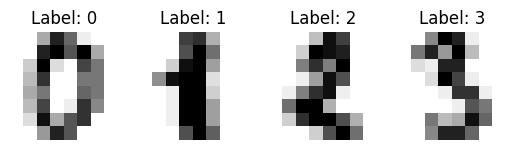

In [ ]:
# Visualizando algumas imagens e labels
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:4]):
  plt.subplot(2, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
  plt.title('Label: %i' % label)

Montando modelo preditivo

In [ ]:
# Gera X e Y
X = digitos.data # Variavel preditora (dados)
Y = digitos.target # Variavel alvo (conjunto de dados)

print(X.shape, Y.shape)

(1797, 64) (1797,)


In [ ]:
# Divisão dos dados de treino e de teste
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.3, random_state = 101) # teste = 30%, treino = 70%

In [ ]:
# Divisão dos dados de treino em dados de treino e validação
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, Y_treino, test_size = 0.1, random_state = 84) # separa 10% para validação

In [ ]:
# Imprimindo o número de exemplos (observações) em cada dataset
print("Exemplos de Treino: {}".format(len(treinoLabels)))
print("Exemplos de Validação: {}".format(len(validLabels)))
print("Exemplos de Teste: {}".format(len(testeLabels)))

Exemplos de Treino: 1131
Exemplos de Validação: 126
Exemplos de Teste: 540


In [ ]:
# Normalização dos dados pela Média (apenas nas variáveis preditoras)

# Cálculo da média do dataset do treino
X_norm = np.mean(X, axis=0)

# Normalização dos dados de treino e de teste
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_test_norm = testeData - X_norm

print(X_treino_norm.shape, X_valid_norm.shape, X_test_norm.shape)

(1131, 64) (126, 64) (540, 64)


Criação modelo preditivo

In [ ]:
# Range de valores de k que iremos testar
kVals = range(1, 30, 2)

# Lista vazia para receber as acurácias
acuracias = []

In [ ]:
# Loop em todos os valores de k para testar cada um deles
for k in kVals:

	# Treinando o modelo KNN com cada valor de k
	modeloKNN = KNeighborsClassifier(n_neighbors = k)
	modeloKNN.fit(treinoData, treinoLabels)

	# Avaliando o modelo e atualizando a lista de acurácias
	score = modeloKNN.score(validData, validLabels) # Validação nos dados de teste
	print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
	acuracias. append(score)

Com valor de k = 1, a acurácia é = 99.21%
Com valor de k = 3, a acurácia é = 100.00%
Com valor de k = 5, a acurácia é = 100.00%
Com valor de k = 7, a acurácia é = 99.21%
Com valor de k = 9, a acurácia é = 98.41%
Com valor de k = 11, a acurácia é = 98.41%
Com valor de k = 13, a acurácia é = 97.62%
Com valor de k = 15, a acurácia é = 97.62%
Com valor de k = 17, a acurácia é = 97.62%
Com valor de k = 19, a acurácia é = 97.62%
Com valor de k = 21, a acurácia é = 97.62%
Com valor de k = 23, a acurácia é = 97.62%
Com valor de k = 25, a acurácia é = 96.83%
Com valor de k = 27, a acurácia é = 96.83%
Com valor de k = 29, a acurácia é = 96.83%


In [ ]:
# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], acuracias[i] * 100))

O valor de k = 3 alcançou a mais alta acurácia de 100.00% nos dados de validação!


Criação do modelo final

In [ ]:
# Criando a versão final do modelo com o maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])

# Treinamento do modelo
# Observe que neste caso usou a metrica de distancia de minkowski mas isso pode mudar os parametros
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Previsões com os dados de teste
predictions = modeloFinal.predict(testeData)

# Performace do modelo nos dados de teste
print("Avaliação do modelo nos Dados de Teste")
print(classification_report(testeLabels, predictions))

Avaliação do modelo nos Dados de Teste
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.96      1.00      0.98        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [ ]:
# Confusion Matrix do Modelo Final
print("Confusion Matrix")
print(confusion_matrix(testeLabels, predictions)) # Dados de erro, e dados de acerto do modelo

Confusion Matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  1]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


Eu acredito que esse dígito seja: 2


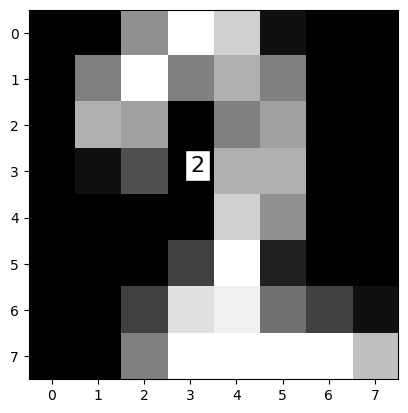

Eu acredito que esse dígito seja: 1


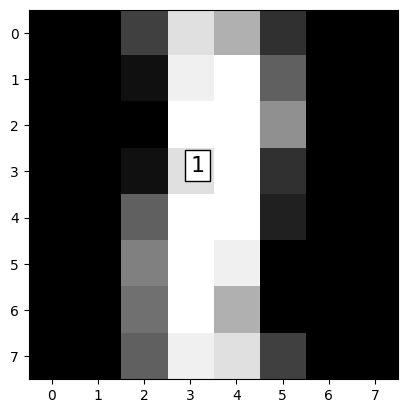

Eu acredito que esse dígito seja: 3


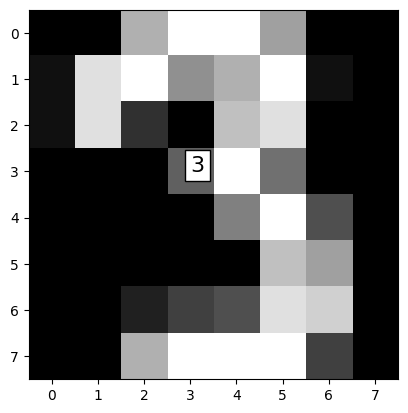

Eu acredito que esse dígito seja: 9


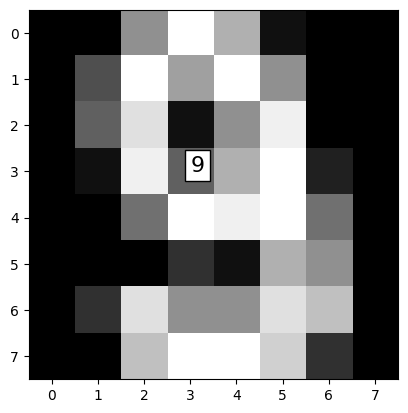

Eu acredito que esse dígito seja: 6


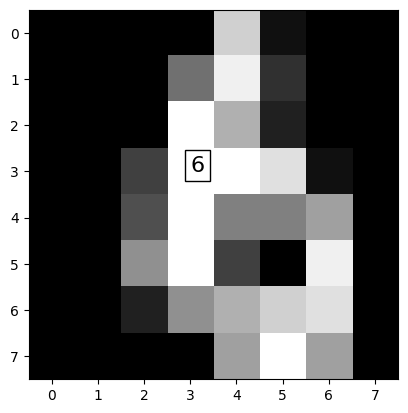

In [ ]:
# Fazendo previsões com o modelo treinado usando os dados de teste
for i in np.random.randint(0, high=len(testeLabels), size=(5,)):

	# Obtém uma imageme faz a previsão
	image = testeData[i]
	prediction = modeloFinal.predict([image])[0]

	# Mostra as previsões
	imgdata = np.array(image, dtype = 'float')
	pixels = imgdata.reshape((8,8))
	plt.imshow(pixels, cmap='gray')
	plt.annotate(prediction,(3,3), bbox={'facecolor':'white'}, fontsize=16)
	print("Eu acredito que esse dígito seja: {}".format(prediction))
	plt.show()

In [ ]:
# Definindo um novo dígito (dados de entrada)
novoDigito = [0., 0., 0., 8., 15., 1., 0., 0., 0., 0., 0., 12., 14.,
	            0., 0., 0., 0., 0., 3., 16., 7., 0., 0., 0., 0., 0.,
	            6., 16., 2., 0., 0., 0., 0., 0., 7., 16., 16., 13., 5.,
              0., 0., 0., 15., 16., 9., 9., 14., 0., 0., 0., 3., 14.,
              9., 2., 16., 2., 0., 0., 0., 7., 15., 16., 11., 0.]

# Normalizando o novo dígito
novoDigito_norm = novoDigito - X_norm

# Fazendo a previsão com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Eu acredito que esse dígito seja: [6]


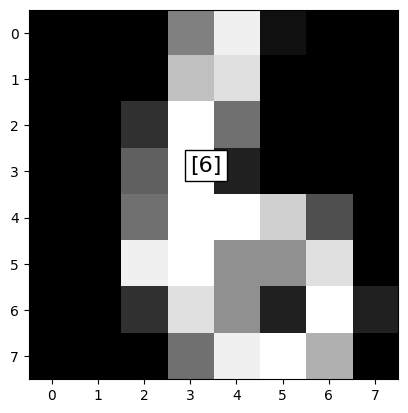

In [ ]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()